<a href="https://colab.research.google.com/github/wulannurafifah/Tugas-1-Scrapping-Serpapi-Text-Mining/blob/main/uts_restoran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

# Warnings
import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns', None)

In [78]:
filename = "https://raw.githubusercontent.com/wulannurafifah/Tugas1-Scrapping-Serpapi-Text-Mining/main/data_textmining.csv"
df = pd.read_csv(filename, encoding = 'latin-1')
df

,hotel_name,name,rating,review
0,Hotel Tentrem Semarang,Melyanti Liando,5.0,I stayed in this hotel Twice. The first was on...
1,Hotel Tentrem Semarang,F Paul,5.0,We enjoyed our stay here. The room is not as b...
2,Hotel Tentrem Semarang,Cynthia Isabella,5.0,"Two months ago, I stayed at Tentrem Hotel Sema..."
3,Hotel Tentrem Semarang,Karel K. Himawan,5.0,The hotel that gives you a one of a kind exper...
4,Hotel Tentrem Semarang,Francois Barbe,5.0,First class service in a first class way. A re...
...,...,...,...,...
495,Gumaya Tower Hotel,buyung mahendra,5.0,This is a five star hotel in semarang. The roo...
496,Gumaya Tower Hotel,Andy Wijaya,5.0,Going to bukber event at Marquess. My favorite...
497,Gumaya Tower Hotel,Jess Lam,5.0,Location is in center of town though no shoppi...
498,Gumaya Tower Hotel,Lumi Loo,3.0,Decent size rooms for a 5 star hotel outside t...


In [79]:
df.drop(columns = ['hotel_name', 'name'], inplace = True)

Preprocessing Data

Cleaning The Text

In [80]:
import string
import re

In [81]:
def clean_review(review):
    return re.sub('[^a-zA-Z]', ' ', review).lower()
  
df['cleaned_review'] = df['review'].apply(lambda x: clean_review(str(x)))
df['label'] = df['rating'].map({1.0:0, 2.0:0, 3.0:0, 4.0:1, 5.0:1})

Adding additional features - length of, and percentage of punctuations in the text

In [82]:
def count_punct(review):
    count = sum([1 for char in review if char in string.punctuation])
    return round(count/(len(review) - review.count(" ")), 3)*100
  
df['review_len'] = df['review'].apply(lambda x: len(str(x)) - str(x).count(" "))
df['punct'] = df['review'].apply(lambda x: count_punct(str(x)))
df

,rating,review,cleaned_review,label,review_len,punct
0,5.0,I stayed in this hotel Twice. The first was on...,i stayed in this hotel twice the first was on...,1,265,5.7
1,5.0,We enjoyed our stay here. The room is not as b...,we enjoyed our stay here the room is not as b...,1,328,2.7
2,5.0,"Two months ago, I stayed at Tentrem Hotel Sema...",two months ago i stayed at tentrem hotel sema...,1,671,3.9
3,5.0,The hotel that gives you a one of a kind exper...,the hotel that gives you a one of a kind exper...,1,322,2.5
4,5.0,First class service in a first class way. A re...,first class service in a first class way a re...,1,231,6.1
...,...,...,...,...,...,...
495,5.0,This is a five star hotel in semarang. The roo...,this is a five star hotel in semarang the roo...,1,215,2.8
496,5.0,Going to bukber event at Marquess. My favorite...,going to bukber event at marquess my favorite...,1,281,3.2
497,5.0,Location is in center of town though no shoppi...,location is in center of town though no shoppi...,1,280,2.9
498,3.0,Decent size rooms for a 5 star hotel outside t...,decent size rooms for a star hotel outside t...,0,601,3.3


Tokenization

In [83]:
def tokenize_review(review):
    tokenized_review = review.split()
    return tokenized_review
  
df['tokens'] = df['cleaned_review'].apply(lambda x: tokenize_review(x))
df.head()

,rating,review,cleaned_review,label,review_len,punct,tokens
0,5.0,I stayed in this hotel Twice. The first was on...,i stayed in this hotel twice the first was on...,1,265,5.7,"[i, stayed, in, this, hotel, twice, the, first..."
1,5.0,We enjoyed our stay here. The room is not as b...,we enjoyed our stay here the room is not as b...,1,328,2.7,"[we, enjoyed, our, stay, here, the, room, is, ..."
2,5.0,"Two months ago, I stayed at Tentrem Hotel Sema...",two months ago i stayed at tentrem hotel sema...,1,671,3.9,"[two, months, ago, i, stayed, at, tentrem, hot..."
3,5.0,The hotel that gives you a one of a kind exper...,the hotel that gives you a one of a kind exper...,1,322,2.5,"[the, hotel, that, gives, you, a, one, of, a, ..."
4,5.0,First class service in a first class way. A re...,first class service in a first class way a re...,1,231,6.1,"[first, class, service, in, a, first, class, w..."


In [84]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [85]:
def lemmatize_review(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_review(x))
df.head()

,rating,review,cleaned_review,label,review_len,punct,tokens,lemmatized_review
0,5.0,I stayed in this hotel Twice. The first was on...,i stayed in this hotel twice the first was on...,1,265,5.7,"[i, stayed, in, this, hotel, twice, the, first...",stayed hotel twice first january second july r...
1,5.0,We enjoyed our stay here. The room is not as b...,we enjoyed our stay here the room is not as b...,1,328,2.7,"[we, enjoyed, our, stay, here, the, room, is, ...",enjoyed stay room not big star hotel java comf...
2,5.0,"Two months ago, I stayed at Tentrem Hotel Sema...",two months ago i stayed at tentrem hotel sema...,1,671,3.9,"[two, months, ago, i, stayed, at, tentrem, hot...",two month ago stayed tentrem hotel semarang fa...
3,5.0,The hotel that gives you a one of a kind exper...,the hotel that gives you a one of a kind exper...,1,322,2.5,"[the, hotel, that, gives, you, a, one, of, a, ...",hotel give one kind experience unlike star hot...
4,5.0,First class service in a first class way. A re...,first class service in a first class way a re...,1,231,6.1,"[first, class, service, in, a, first, class, w...",first class service first class way real five ...


EDA

In [86]:
#  Shape of the dataset, and breakdown of the classes
print(f"Input data has { len(df) } rows and { len(df.columns) } columns")
print(f"rating 1.0 = { len(df[df['rating']==1.0]) } rows")
print(f"rating 2.0 = { len(df[df['rating']==2.0]) } rows")
print(f"rating 3.0 = { len(df[df['rating']==3.0]) } rows")
print(f"rating 4.0 = { len(df[df['rating']==4.0]) } rows")
print(f"rating 5.0 = { len(df[df['rating']==5.0]) } rows")

Input data has 500 rows and 8 columns
rating 1.0 = 15 rows
rating 2.0 = 26 rows
rating 3.0 = 57 rows
rating 4.0 = 114 rows
rating 5.0 = 288 rows


Number of null in label: 0
Number of null in text: 0


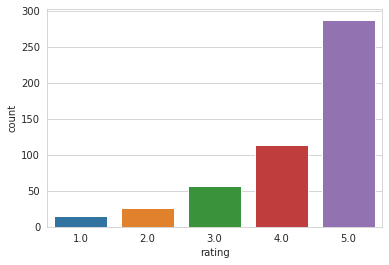

In [87]:
# Missing values in the dataset
print(f"Number of null in label: { df['rating'].isnull().sum() }")
print(f"Number of null in text: { df['review'].isnull().sum() }")
sns.countplot(x='rating', data=df);

Visualizing Word Clouds

In [88]:
from wordcloud import WordCloud

In [89]:
df_negative = df[ (df['rating']==1.0) | (df['rating']==2.0) | (df['rating']==3.0) ]
df_positive = df[ (df['rating']==4.0) | (df['rating']==5.0) ]

#convert to list
negative_list=df_negative['lemmatized_review'].tolist()
positive_list=df_positive['lemmatized_review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of negative
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of positive
filtered_positive = filtered_positive.lower()

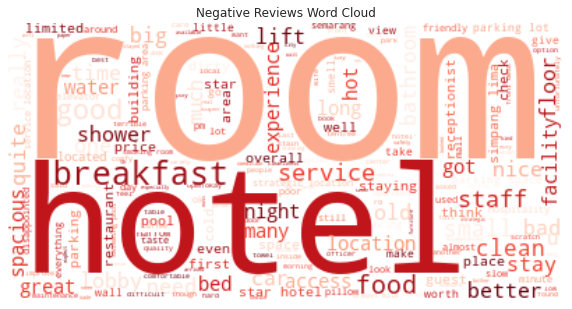

In [90]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

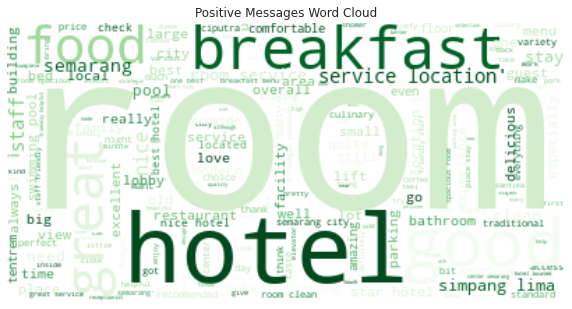

In [91]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Messages Word Cloud")
plt.show()

Feature Extraction from Text

In [92]:
X = df[['lemmatized_review', 'review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(500, 3)
(500,)


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 3)
(150, 3)
(350,)
(150,)


In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_review'])
tfidf_test = tfidf.transform(X_test['lemmatized_review'])

X_train_vect = pd.concat([X_train[['review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,review_len,punct,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953
0,147,6.8,0.0,0.0,0.0,0.292388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.22764,0.0,0.0,0.000000,0.462611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

Training different Classification models

In [95]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Menggunakan Algoritma Multinomia Naive Bayes

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.77      1.00      0.87       115

    accuracy                           0.77       150
   macro avg       0.38      0.50      0.43       150
weighted avg       0.59      0.77      0.67       150



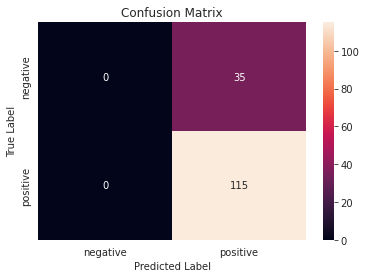

In [96]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma Random Forest Classiefier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.77      0.99      0.86       115

    accuracy                           0.76       150
   macro avg       0.38      0.50      0.43       150
weighted avg       0.59      0.76      0.66       150



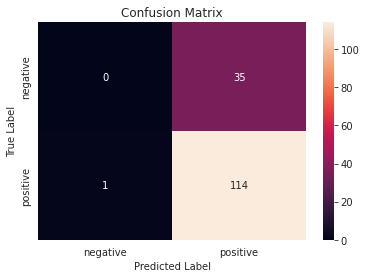

In [97]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma Logistic Regression

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.77      0.99      0.86       115

    accuracy                           0.76       150
   macro avg       0.38      0.50      0.43       150
weighted avg       0.59      0.76      0.66       150



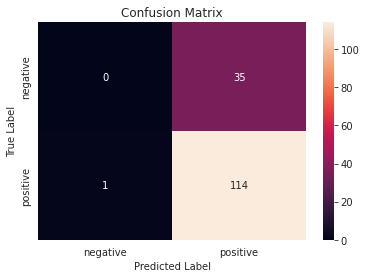

In [98]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma Support Vector Machine

              precision    recall  f1-score   support

           0       0.62      0.23      0.33        35
           1       0.80      0.96      0.87       115

    accuracy                           0.79       150
   macro avg       0.71      0.59      0.60       150
weighted avg       0.76      0.79      0.75       150



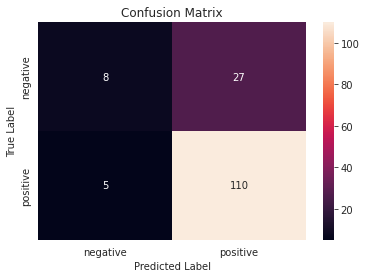

In [99]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma KNN (K NEAREST NEIGHBOUR)

              precision    recall  f1-score   support

           0       0.50      0.11      0.19        35
           1       0.78      0.97      0.86       115

    accuracy                           0.77       150
   macro avg       0.64      0.54      0.52       150
weighted avg       0.72      0.77      0.71       150



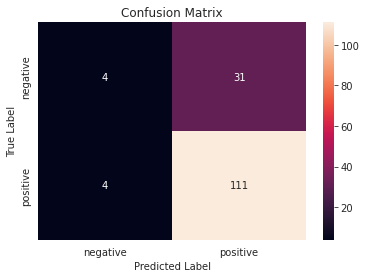

In [100]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan algoritma Extra Tress Classifier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.76      0.98      0.86       115

    accuracy                           0.75       150
   macro avg       0.38      0.49      0.43       150
weighted avg       0.59      0.75      0.66       150



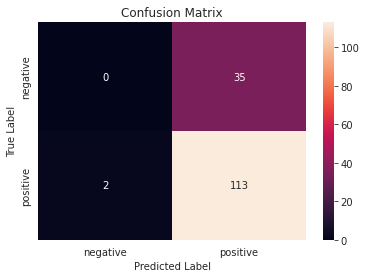

In [101]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)
classifier.fit(X_train_vect, y_train)
extra_trees_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, extra_trees_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, extra_trees_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

K=10

In [ ]:
from sklearn.model_selection import cross_val_score

models = [
          MultinomialNB(),
          LogisticRegression(),
          RandomForestClassifier(n_estimators = 150),
          SVC(kernel = 'linear'),
          KNeighborsClassifier(n_neighbors = 5),
          ExtraTreesClassifier(n_estimators=150, random_state=50)
         ]
names = ["Naive Bayes", "Logistic Regression", "Random Forest", "SVM", "KNN", "Extra Trees"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")
    print()

Naive Bayes
 accuracy - 0.82 
 precision - 0.82 
 recall - 1.0 
 f1 - 0.9010416666666667 

Logistic Regression
 accuracy - 0.82 
 precision - 0.8239548319327732 
 recall - 0.993103448275862 
 f1 - 0.9003797488940932 

Random Forest
 accuracy - 0.8228571428571427 
 precision - 0.8242857142857142 
 recall - 0.9929802955665025 
 f1 - 0.900739247311828 

SVM


Prediction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(df['lemmatized_review']) # Fit the Data
y_cv = df['label']

from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.3, random_state=42)

In [ ]:
#Naive Bayes Classifier
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()

clf.fit(X_train_cv, y_train_cv)
clf.score(X_test_cv, y_test_cv)

In [ ]:
data = ["Bad", "I hate the service, it's really bad", "small", "good"]
vect = cv.transform(data).toarray()

my_prediction = clf.predict(vect)
print(my_prediction)